In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
titanic = pd.read_csv("resources/titanic_train.csv")

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## missing data

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

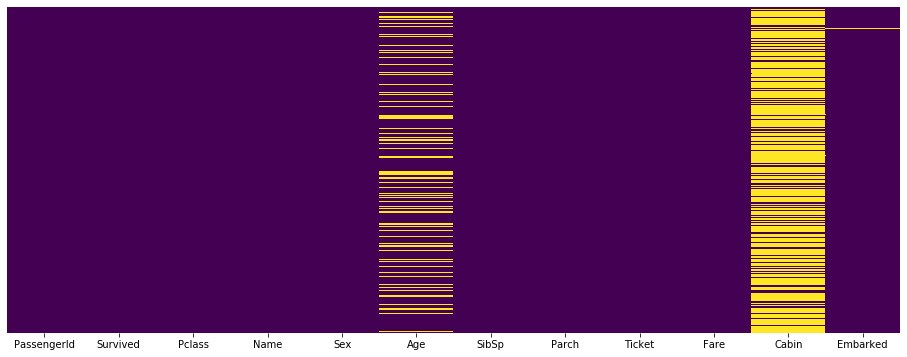

In [14]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## we will eliminate columns with too many missing data points and replace values that are responable

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


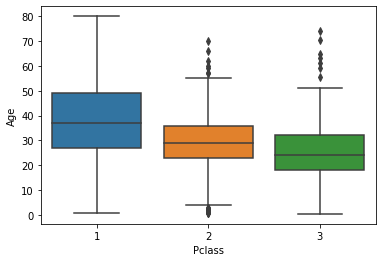

In [16]:
sns.boxplot(x = "Pclass", y = "Age", data=titanic)

## appears the average age of a person on 1st is 38, 2nd  30, and 3rd is 28 so we wil ldeal with the missing data that way

In [18]:
def deal_with_missing(columns):
    pclass = columns[0]
    age = columns[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 28
    else:
        return age
    

## appling our function 

In [22]:
titanic["Age"] = titanic[["Pclass","Age"]].apply(deal_with_missing, axis = 1)

In [23]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

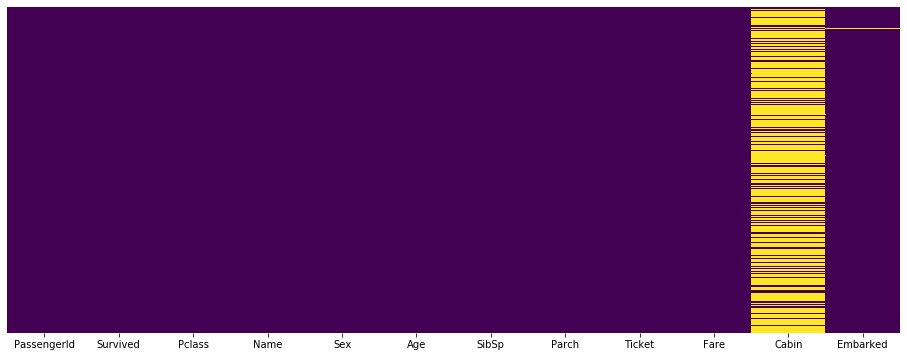

In [24]:
plt.figure(figsize=(16,6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### removing data 

In [25]:
titanic.drop("Cabin", axis=1, inplace=True)

In [27]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [28]:
titanic.dropna(inplace=True)

In [30]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### getting dummies 

In [32]:
sex = pd.get_dummies(titanic["Sex"], drop_first=True)

In [34]:
titanic["Sex"] = sex

In [36]:
emb = pd.get_dummies(titanic["Embarked"], drop_first=True)

In [38]:
titanic = pd.concat([titanic, emb], axis=1)

In [42]:
titanic.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [44]:
titanic.drop("Embarked", axis=1, inplace=True)

In [45]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,28,1,0,7.2500,0,1
1,1,1,0,38,1,0,71.2833,0,0
2,1,3,0,28,0,0,7.9250,0,1
3,1,1,0,38,1,0,53.1000,0,1
4,0,3,1,28,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,30,0,0,13.0000,0,1
887,1,1,0,38,0,0,30.0000,0,1
888,0,3,0,28,1,2,23.4500,0,1
889,1,1,1,38,0,0,30.0000,0,0


### Training Data

In [60]:
X = titanic.drop("Survived", axis=1).values
y = titanic["Survived"].values

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scalar = MinMaxScaler()

In [65]:
X_train = scalar.fit_transform(X_train)

In [66]:
X_test = scalar.transform(X_test)

### Developing out ANN 

In [67]:
X_train.shape

(622, 8)

In [68]:
from tensorflow.keras.models import Sequential

In [69]:
from tensorflow.keras.layers import Dense

In [70]:
model =Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [78]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500)

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 0s 259us/sample - loss: 0.4322 - val_loss: 0.4272
Epoch 2/500
622/622 [==============================] - 0s 185us/sample - loss: 0.4302 - val_loss: 0.4291
Epoch 3/500
622/622 [==============================] - 0s 181us/sample - loss: 0.4309 - val_loss: 0.4289
Epoch 4/500
622/622 [==============================] - 0s 184us/sample - loss: 0.4300 - val_loss: 0.4298
Epoch 5/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4305 - val_loss: 0.4286
Epoch 6/500
622/622 [==============================] - 0s 187us/sample - loss: 0.4316 - val_loss: 0.4280
Epoch 7/500
622/622 [==============================] - 0s 188us/sample - loss: 0.4299 - val_loss: 0.4294
Epoch 8/500
622/622 [==============================] - 0s 207us/sample - loss: 0.4296 - val_loss: 0.4285
Epoch 9/500
622/622 [==============================] - 0s 213us/sample - loss: 0.4311 - val_loss: 0.4280
Epoch 10/

Epoch 78/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4248 - val_loss: 0.4268
Epoch 79/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4257 - val_loss: 0.4268
Epoch 80/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4248 - val_loss: 0.4269
Epoch 81/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4259 - val_loss: 0.4263
Epoch 82/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4254 - val_loss: 0.4265
Epoch 83/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4245 - val_loss: 0.4273
Epoch 84/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4249 - val_loss: 0.4265
Epoch 85/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4242 - val_loss: 0.4261
Epoch 86/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4242 - val_loss: 0.4269
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4191 - val_loss: 0.4218
Epoch 156/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4207 - val_loss: 0.4227
Epoch 157/500
622/622 [==============================] - 0s 178us/sample - loss: 0.4197 - val_loss: 0.4206
Epoch 158/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4191 - val_loss: 0.4228
Epoch 159/500
622/622 [==============================] - 0s 178us/sample - loss: 0.4201 - val_loss: 0.4223
Epoch 160/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4195 - val_loss: 0.4218
Epoch 161/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4199 - val_loss: 0.4217
Epoch 162/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4193 - val_loss: 0.4211
Epoch 163/500
622/622 [==============================] - 0s 184us/sample - loss: 0.4190 - val_loss: 0.4223
Epoch 164/500
622/622 [==============

622/622 [==============================] - 0s 180us/sample - loss: 0.4146 - val_loss: 0.4179
Epoch 308/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4147 - val_loss: 0.4201
Epoch 309/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4137 - val_loss: 0.4189
Epoch 310/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4140 - val_loss: 0.4199
Epoch 311/500
622/622 [==============================] - 0s 187us/sample - loss: 0.4135 - val_loss: 0.4194
Epoch 312/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4128 - val_loss: 0.4194
Epoch 313/500
622/622 [==============================] - 0s 181us/sample - loss: 0.4125 - val_loss: 0.4188
Epoch 314/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4127 - val_loss: 0.4198
Epoch 315/500
622/622 [==============================] - 0s 181us/sample - loss: 0.4124 - val_loss: 0.4187
Epoch 316/500
622/622 [============================

622/622 [==============================] - 0s 182us/sample - loss: 0.4079 - val_loss: 0.4191
Epoch 460/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4083 - val_loss: 0.4174
Epoch 461/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4093 - val_loss: 0.4169
Epoch 462/500
622/622 [==============================] - 0s 181us/sample - loss: 0.4087 - val_loss: 0.4200
Epoch 463/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4088 - val_loss: 0.4172
Epoch 464/500
622/622 [==============================] - 0s 184us/sample - loss: 0.4091 - val_loss: 0.4181
Epoch 465/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4082 - val_loss: 0.4183
Epoch 466/500
622/622 [==============================] - 0s 178us/sample - loss: 0.4085 - val_loss: 0.4179
Epoch 467/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4079 - val_loss: 0.4164
Epoch 468/500
622/622 [============================

## Check performance

In [79]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.432175,0.427187
1,0.430169,0.429093
2,0.430857,0.428940
3,0.430012,0.429797
4,0.430475,0.428639
...,...,...
495,0.408124,0.418654
496,0.407344,0.417096
497,0.407912,0.418279
498,0.407546,0.417254


## model looks to be overfitting..though the predicitons may improve we are overfitting the dat aso lets set a stop at the lowest error of the valus loss

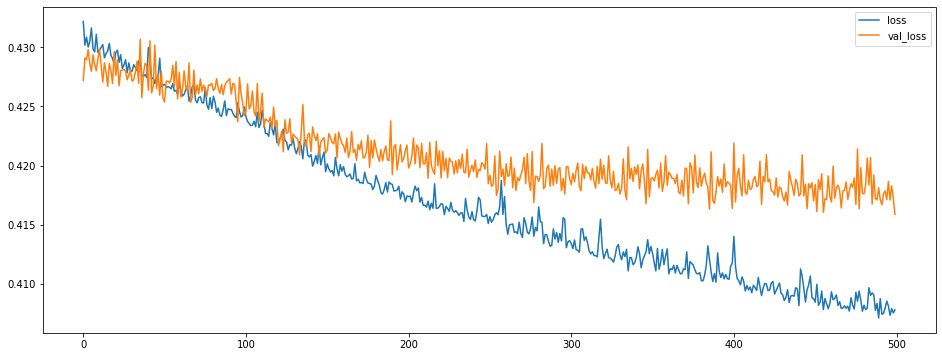

In [80]:
pd.DataFrame(model.history.history).plot(figsize =(16,6))

### model looks really good in terms of the error lets check the predictions

In [81]:
predictions = model.predict_classes(X_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       163
           1       0.88      0.63      0.74       104

    accuracy                           0.82       267
   macro avg       0.84      0.79      0.80       267
weighted avg       0.83      0.82      0.82       267



In [84]:
print(confusion_matrix(y_test,predictions))

[[154   9]
 [ 38  66]]


In [85]:
model =Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
stop = EarlyStopping(mode="min", patience=25)

In [88]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[stop])

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 1s 2ms/sample - loss: 0.7600 - val_loss: 0.7386
Epoch 2/500
622/622 [==============================] - 0s 185us/sample - loss: 0.7279 - val_loss: 0.7134
Epoch 3/500
622/622 [==============================] - 0s 181us/sample - loss: 0.7074 - val_loss: 0.7002
Epoch 4/500
622/622 [==============================] - 0s 186us/sample - loss: 0.6975 - val_loss: 0.6943
Epoch 5/500
622/622 [==============================] - 0s 184us/sample - loss: 0.6916 - val_loss: 0.6891
Epoch 6/500
622/622 [==============================] - 0s 182us/sample - loss: 0.6861 - val_loss: 0.6843
Epoch 7/500
622/622 [==============================] - 0s 184us/sample - loss: 0.6808 - val_loss: 0.6793
Epoch 8/500
622/622 [==============================] - 0s 186us/sample - loss: 0.6726 - val_loss: 0.6667
Epoch 9/500
622/622 [==============================] - 0s 193us/sample - loss: 0.6562 - val_loss: 0.6489
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4500 - val_loss: 0.4357
Epoch 79/500
622/622 [==============================] - 0s 177us/sample - loss: 0.4499 - val_loss: 0.4350
Epoch 80/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4497 - val_loss: 0.4353
Epoch 81/500
622/622 [==============================] - 0s 178us/sample - loss: 0.4497 - val_loss: 0.4360
Epoch 82/500
622/622 [==============================] - 0s 177us/sample - loss: 0.4494 - val_loss: 0.4353
Epoch 83/500
622/622 [==============================] - 0s 178us/sample - loss: 0.4497 - val_loss: 0.4361
Epoch 84/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4509 - val_loss: 0.4341
Epoch 85/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4493 - val_loss: 0.4372
Epoch 86/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4493 - val_loss: 0.4359
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 181us/sample - loss: 0.4441 - val_loss: 0.4297
Epoch 156/500
622/622 [==============================] - 0s 179us/sample - loss: 0.4437 - val_loss: 0.4273
Epoch 157/500
622/622 [==============================] - 0s 178us/sample - loss: 0.4433 - val_loss: 0.4285
Epoch 158/500
622/622 [==============================] - 0s 180us/sample - loss: 0.4432 - val_loss: 0.4282
Epoch 159/500
622/622 [==============================] - 0s 183us/sample - loss: 0.4429 - val_loss: 0.4286
Epoch 160/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4431 - val_loss: 0.4287
Epoch 161/500
622/622 [==============================] - 0s 185us/sample - loss: 0.4428 - val_loss: 0.4284
Epoch 162/500
622/622 [==============================] - 0s 187us/sample - loss: 0.4427 - val_loss: 0.4288
Epoch 163/500
622/622 [==============================] - 0s 189us/sample - loss: 0.4437 - val_loss: 0.4270
Epoch 164/500
622/622 [==============

622/622 [==============================] - 0s 183us/sample - loss: 0.4325 - val_loss: 0.4248
Epoch 308/500
622/622 [==============================] - 0s 185us/sample - loss: 0.4328 - val_loss: 0.4249
Epoch 309/500
622/622 [==============================] - 0s 190us/sample - loss: 0.4326 - val_loss: 0.4235
Epoch 310/500
622/622 [==============================] - 0s 184us/sample - loss: 0.4326 - val_loss: 0.4246
Epoch 311/500
622/622 [==============================] - 0s 182us/sample - loss: 0.4328 - val_loss: 0.4239
Epoch 312/500
622/622 [==============================] - 0s 188us/sample - loss: 0.4323 - val_loss: 0.4245
Epoch 313/500
622/622 [==============================] - 0s 181us/sample - loss: 0.4322 - val_loss: 0.4244
Epoch 314/500
622/622 [==============================] - 0s 181us/sample - loss: 0.4323 - val_loss: 0.4238
Epoch 315/500
622/622 [==============================] - 0s 185us/sample - loss: 0.4323 - val_loss: 0.4243
Epoch 316/500
622/622 [============================

## performance

In [89]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.759950,0.738587
1,0.727947,0.713437
2,0.707357,0.700174
3,0.697481,0.694311
4,0.691601,0.689140
...,...,...
314,0.432260,0.424314
315,0.433743,0.427378
316,0.432122,0.424161
317,0.431934,0.423665


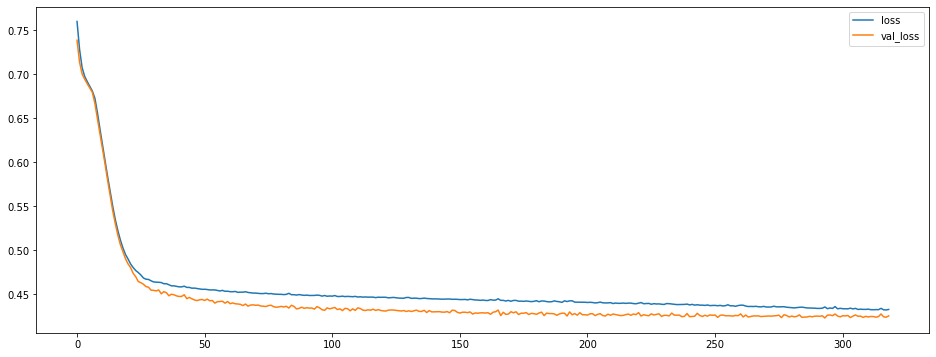

In [90]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [91]:
pred = model.predict_classes(X_test)

In [93]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       163
           1       0.91      0.56      0.69       104

    accuracy                           0.81       267
   macro avg       0.84      0.76      0.77       267
weighted avg       0.83      0.81      0.79       267



## lets add a Drop instnce at each neuron

In [94]:
from tensorflow.keras.layers import Dropout

In [95]:
model =Sequential()
model.add(Dense(units = 8, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer="adam")

In [96]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test), callbacks=[stop])

Train on 622 samples, validate on 267 samples
Epoch 1/500
622/622 [==============================] - 1s 2ms/sample - loss: 0.7110 - val_loss: 0.6856
Epoch 2/500
622/622 [==============================] - 0s 204us/sample - loss: 0.6878 - val_loss: 0.6701
Epoch 3/500
622/622 [==============================] - 0s 207us/sample - loss: 0.6727 - val_loss: 0.6585
Epoch 4/500
622/622 [==============================] - 0s 196us/sample - loss: 0.6679 - val_loss: 0.6499
Epoch 5/500
622/622 [==============================] - 0s 197us/sample - loss: 0.6520 - val_loss: 0.6402
Epoch 6/500
622/622 [==============================] - 0s 201us/sample - loss: 0.6472 - val_loss: 0.6307
Epoch 7/500
622/622 [==============================] - 0s 197us/sample - loss: 0.6288 - val_loss: 0.6229
Epoch 8/500
622/622 [==============================] - 0s 199us/sample - loss: 0.6323 - val_loss: 0.6144
Epoch 9/500
622/622 [==============================] - 0s 198us/sample - loss: 0.6317 - val_loss: 0.6069
Epoch 10/50

Epoch 78/500
622/622 [==============================] - 0s 196us/sample - loss: 0.5258 - val_loss: 0.4818
Epoch 79/500
622/622 [==============================] - 0s 196us/sample - loss: 0.5351 - val_loss: 0.4798
Epoch 80/500
622/622 [==============================] - 0s 193us/sample - loss: 0.5299 - val_loss: 0.4793
Epoch 81/500
622/622 [==============================] - 0s 198us/sample - loss: 0.5105 - val_loss: 0.4764
Epoch 82/500
622/622 [==============================] - 0s 197us/sample - loss: 0.5306 - val_loss: 0.4752
Epoch 83/500
622/622 [==============================] - 0s 195us/sample - loss: 0.5033 - val_loss: 0.4747
Epoch 84/500
622/622 [==============================] - 0s 198us/sample - loss: 0.5289 - val_loss: 0.4731
Epoch 85/500
622/622 [==============================] - 0s 198us/sample - loss: 0.5239 - val_loss: 0.4722
Epoch 86/500
622/622 [==============================] - 0s 196us/sample - loss: 0.5346 - val_loss: 0.4720
Epoch 87/500
622/622 [========================

Epoch 155/500
622/622 [==============================] - 0s 196us/sample - loss: 0.5058 - val_loss: 0.4550
Epoch 156/500
622/622 [==============================] - 0s 197us/sample - loss: 0.5300 - val_loss: 0.4538
Epoch 157/500
622/622 [==============================] - 0s 199us/sample - loss: 0.5212 - val_loss: 0.4592
Epoch 158/500
622/622 [==============================] - 0s 200us/sample - loss: 0.5210 - val_loss: 0.4601
Epoch 159/500
622/622 [==============================] - 0s 199us/sample - loss: 0.5232 - val_loss: 0.4602
Epoch 160/500
622/622 [==============================] - 0s 199us/sample - loss: 0.5224 - val_loss: 0.4622
Epoch 161/500
622/622 [==============================] - 0s 201us/sample - loss: 0.5155 - val_loss: 0.4623
Epoch 162/500
622/622 [==============================] - 0s 201us/sample - loss: 0.5107 - val_loss: 0.4590
Epoch 163/500
622/622 [==============================] - 0s 198us/sample - loss: 0.5241 - val_loss: 0.4573
Epoch 164/500
622/622 [==============

In [98]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.710965,0.685638
1,0.687751,0.670094
2,0.672702,0.658548
3,0.667871,0.649896
4,0.651976,0.640203
...,...,...
191,0.523846,0.456722
192,0.514735,0.457326
193,0.502053,0.457739
194,0.497872,0.458501


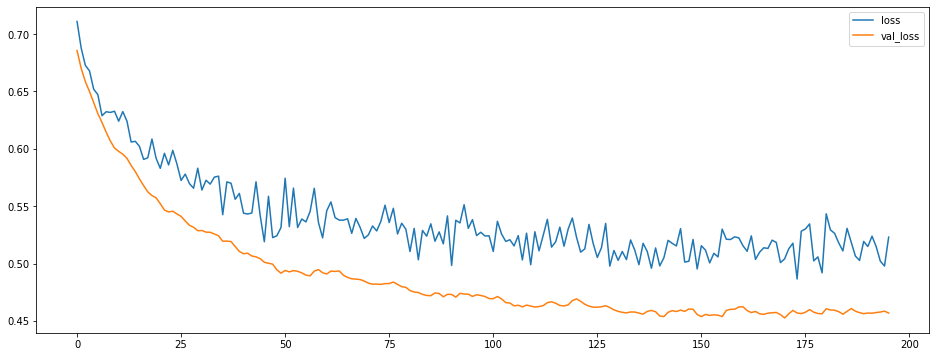

In [99]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [100]:
pree = model.predict_classes(X_test)

In [101]:
print(classification_report(y_test,pree))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       163
           1       0.91      0.56      0.69       104

    accuracy                           0.81       267
   macro avg       0.84      0.76      0.77       267
weighted avg       0.83      0.81      0.79       267

